# Credit Card Fraud Detection

#### It contains legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the dataset
data = pd.read_csv('fraudTrain.csv')

In [3]:
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [4]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
data.shape

(1296675, 23)

In [6]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [7]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [8]:
data = data.set_index('Unnamed: 0')

In [9]:
data.rename(columns={'Unnamed: 0':'id'})

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0


In [10]:
data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [36]:
data.isnull().count()

trans_date_trans_time    1296675
cc_num                   1296675
merchant                 1296675
category                 1296675
amt                      1296675
first                    1296675
last                     1296675
gender                   1296675
street                   1296675
city                     1296675
state                    1296675
zip                      1296675
lat                      1296675
long                     1296675
city_pop                 1296675
job                      1296675
dob                      1296675
trans_num                1296675
unix_time                1296675
merch_lat                1296675
merch_long               1296675
is_fraud                 1296675
dtype: int64

In [12]:
data.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [13]:
len(data) - len(data.dropna())

0

In [14]:
data['is_fraud'].unique()

array([0, 1], dtype=int64)

In [15]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [16]:
data['dob_year'] = data['dob'].str.split('-').str[0]

In [17]:
data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,dob_year
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,1988
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,1978
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,1962
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,1967
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,1961
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,1979
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,1967


## Exploratory Data Analysis

In [83]:
a = data.groupby(['category'])['amt'].sum()

In [85]:
a.to_frame()

,amt
category,
entertainment,6036678.56
food_dining,4672459.44
gas_transport,8351732.29
grocery_net,2439412.68
grocery_pos,14460822.38
health_fitness,4653108.02
home,7173928.11
kids_pets,6503680.16
misc_net,5117709.26


In [39]:
import seaborn as sns

Text(0, 0.5, 'Count')

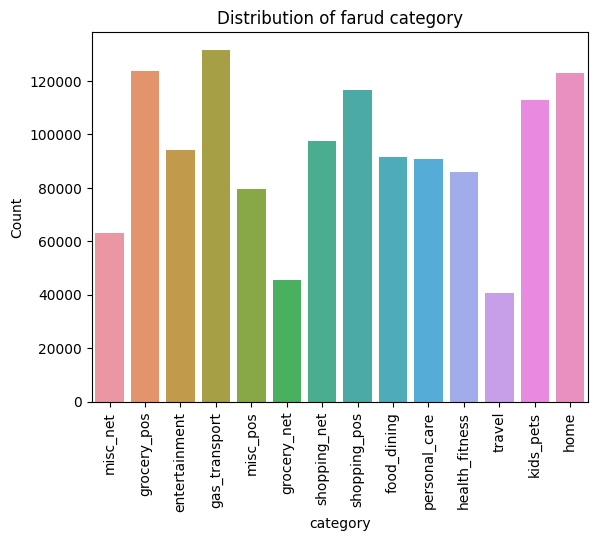

In [48]:
sns.countplot(x='category',data = data)
plt.xticks(rotation = 90)
plt.title('Distribution of fraud category')
plt.xlabel('category')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

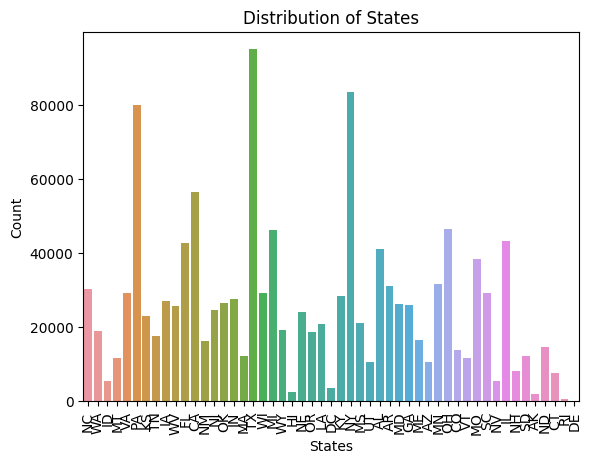

In [51]:
sns.countplot(x=data['state'])
plt.title('Distribution of States')
plt.xticks(rotation = 90)
plt.xlabel('States')
plt.ylabel('Count')

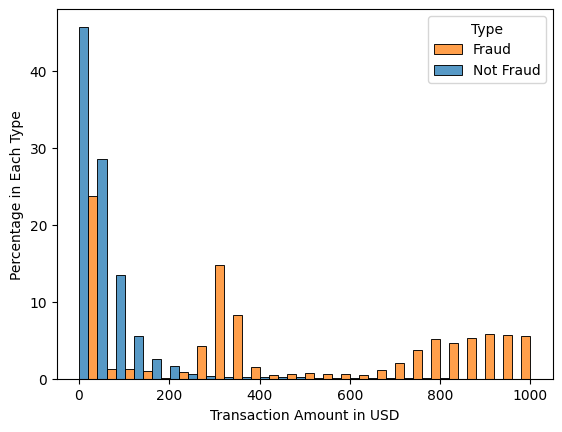

In [68]:
#amount vs fraud
ax=sns.histplot(x='amt',data=data[data.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

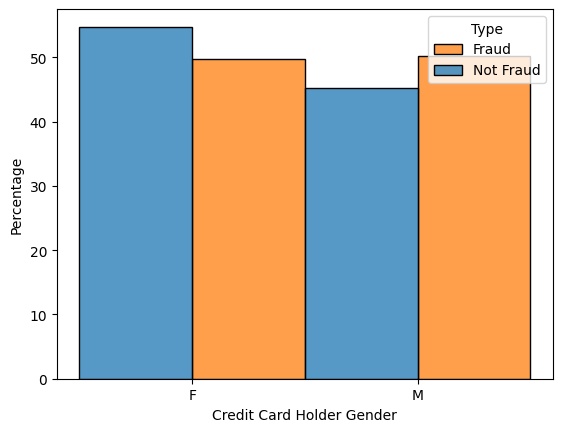

In [70]:
#Gender vs Fraud
ax=sns.histplot(x='gender',data=data, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [75]:
#calculate the percentage difference
a=data[data['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=data[data['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

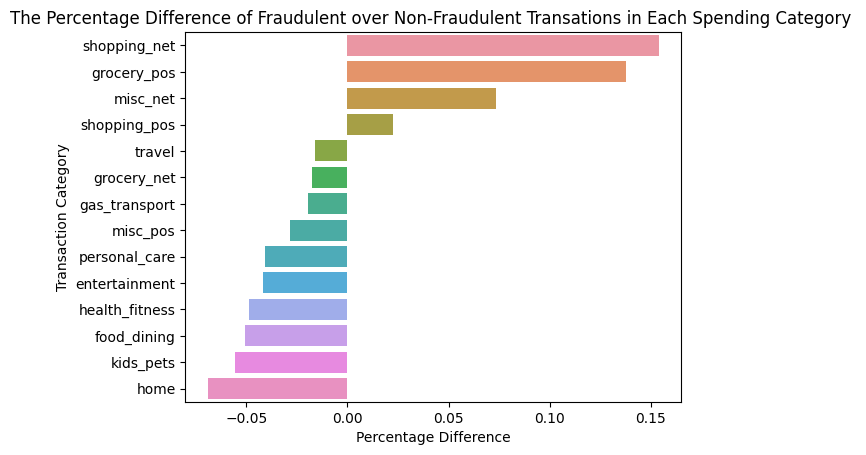

In [76]:
ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

Some spending categories indeed see more fraud than others! Fraud tends to happen more often in 'Shopping_net', 'Grocery_pos', and 'misc_net' while 'home' and 'kids_pets' among others tend to see more normal transactions than fraudulent ones.

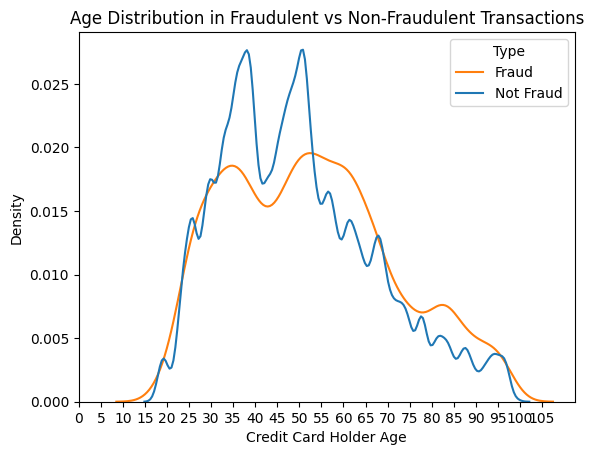

In [78]:
#age vs fraud
import datetime as dt
data['age']=dt.date.today().year-pd.to_datetime(data['dob']).dt.year
ax=sns.kdeplot(x='age',data=data, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

The age distribution is visibly different between 2 transaction types. In normal transactions, there are 2 peaks at the age of 37-38 and 49-50, while in fraudulent transactions, the age distribution is a little smoother and the second peak does include a wider age group from 50-65. This does suggest that older people are potentially more prone to fraud.

In [98]:
data['hour']=pd.to_datetime(data['trans_date_trans_time']).dt.hour

In [100]:
data['day']=pd.to_datetime(data['trans_date_trans_time']).dt.dayofweek

In [101]:
data['month']=pd.to_datetime(data['trans_date_trans_time']).dt.month

In [80]:
a=data['state'][data.is_fraud==0].value_counts(normalize=True)

In [82]:
a.to_frame()

,state
TX,0.073223
NY,0.064341
PA,0.061582
CA,0.043465
OH,0.035805
MI,0.035617
IL,0.033358
FL,0.032882
AL,0.031628
MO,0.029641


In [90]:
cols = [data.columns]

In [91]:
type(cols)

list

In [93]:
cols

[Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
        'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
        'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
        'merch_long', 'is_fraud', 'dob_year', 'age'],
       dtype='object')]

In [94]:
cols = [data.columns]

In [95]:
cols

[Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
        'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
        'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
        'merch_long', 'is_fraud', 'dob_year', 'age'],
       dtype='object')]

In [102]:
train = data[['category', 'amt','zip','lat','long','city_pop','merch_lat',
            'merch_long','age','hour','day','month','is_fraud']]

In [103]:
train

,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,day,month,is_fraud
Unnamed: 0,,,,,,,,,,,,,
0,misc_net,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,35,0,1,1,0
1,grocery_pos,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,45,0,1,1,0
2,entertainment,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,61,0,1,1,0
3,gas_transport,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,56,0,1,1,0
4,misc_pos,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,37,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,84735,37.7175,-112.4777,258,36.841266,-111.690765,62,12,6,6,0
1296671,food_dining,51.70,21790,39.2667,-77.5101,100,38.906881,-78.246528,44,12,6,6,0
1296672,food_dining,105.93,88325,32.9396,-105.8189,899,33.619513,-105.130529,56,12,6,6,0


In [104]:
train = pd.get_dummies(train,drop_first=True)

In [105]:
train

,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,day,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,35,0,1,...,0,0,0,0,1,0,0,0,0,0
1,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,45,0,1,...,1,0,0,0,0,0,0,0,0,0
2,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,61,0,1,...,0,0,0,0,0,0,0,0,0,0
3,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,56,0,1,...,0,0,0,0,0,0,0,0,0,0
4,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,37,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,84735,37.7175,-112.4777,258,36.841266,-111.690765,62,12,6,...,0,0,0,0,0,0,0,0,0,0
1296671,51.70,21790,39.2667,-77.5101,100,38.906881,-78.246528,44,12,6,...,0,0,0,0,0,0,0,0,0,0
1296672,105.93,88325,32.9396,-105.8189,899,33.619513,-105.130529,56,12,6,...,0,0,0,0,0,0,0,0,0,0


In [126]:
y_train = train['is_fraud'].values

In [125]:
x_train = train.drop("is_fraud", axis='columns').values

In [111]:
x_train.shape

(1296675, 26)

In [112]:
y_train.shape

(1296675,)

In [114]:
test=pd.read_csv('fraudTest.csv')

In [115]:
test.shape

(555719, 23)

In [116]:
test['age']=dt.date.today().year-pd.to_datetime(test['dob']).dt.year
test['hour']=pd.to_datetime(test['trans_date_trans_time']).dt.hour
test['day']=pd.to_datetime(test['trans_date_trans_time']).dt.dayofweek
test['month']=pd.to_datetime(test['trans_date_trans_time']).dt.month

In [117]:
test.shape

(555719, 27)

In [118]:
test=test[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]

In [119]:
test

,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,day,month,is_fraud
0,personal_care,2.86,29209,33.9659,-80.9355,333497,33.986391,-81.200714,55,12,6,6,0
1,personal_care,29.84,84002,40.3207,-110.4360,302,39.450498,-109.960431,33,12,6,6,0
2,health_fitness,41.28,11710,40.6729,-73.5365,34496,40.495810,-74.196111,53,12,6,6,0
3,misc_pos,60.05,32780,28.5697,-80.8191,54767,28.812398,-80.883061,36,12,6,6,0
4,travel,3.19,49632,44.2529,-85.0170,1126,44.959148,-85.884734,68,12,6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,health_fitness,43.77,63453,40.4931,-91.8912,519,39.946837,-91.333331,57,23,3,12,0
555715,kids_pets,111.84,77566,29.0393,-95.4401,28739,29.661049,-96.186633,24,23,3,12,0
555716,kids_pets,86.88,99323,46.1966,-118.9017,3684,46.658340,-119.715054,42,23,3,12,0
555717,travel,7.99,83643,44.6255,-116.4493,129,44.470525,-117.080888,58,23,3,12,0


In [120]:
#convert category to dummy variables
test=pd.get_dummies(test, drop_first=True)
y_test=test['is_fraud'].values
X_test=test.drop("is_fraud", axis='columns').values

In [122]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [128]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [130]:
predicted=model.predict(X_test)

In [131]:
print('Classification report:\n', classification_report(y_test, predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



In [132]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)

In [133]:
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[553224    350]
 [  2145      0]]


In [134]:
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

Share of Non-Fraud in Test Data: 0.9961


In [46]:
data.shape

(1296675, 9)

In [47]:
data.head()

,category,amt,gender,city,state,city_pop,job,is_fraud,dob_year
Unnamed: 0,,,,,,,,,
0,misc_net,4.97,F,Moravian Falls,NC,3495,"Psychologist, counselling",0,1988
1,grocery_pos,107.23,F,Orient,WA,149,Special educational needs teacher,0,1978
2,entertainment,220.11,M,Malad City,ID,4154,Nature conservation officer,0,1962
3,gas_transport,45.00,M,Boulder,MT,1939,Patent attorney,0,1967
4,misc_pos,41.96,M,Doe Hill,VA,99,Dance movement psychotherapist,0,1986


In [48]:
data.columns

Index(['category', 'amt', 'gender', 'city', 'state', 'city_pop', 'job',
       'is_fraud', 'dob_year'],
      dtype='object')

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
lbe = LabelEncoder()

In [51]:
data['categoty_e']=lbe.fit_transform(data['category'])
data['gender_e']=lbe.fit_transform(data['gender'])
data['city_e']=lbe.fit_transform(data['city'])
data['state_e']=lbe.fit_transform(data['state'])
data['city_e']=lbe.fit_transform(data['city'])
data['job_e']=lbe.fit_transform(data['job'])

In [52]:
data

,category,amt,gender,city,state,city_pop,job,is_fraud,dob_year,categoty_e,gender_e,city_e,state_e,job_e
Unnamed: 0,,,,,,,,,,,,,,
0,misc_net,4.97,F,Moravian Falls,NC,3495,"Psychologist, counselling",0,1988,8,0,526,27,370
1,grocery_pos,107.23,F,Orient,WA,149,Special educational needs teacher,0,1978,4,0,612,47,428
2,entertainment,220.11,M,Malad City,ID,4154,Nature conservation officer,0,1962,0,1,468,13,307
3,gas_transport,45.00,M,Boulder,MT,1939,Patent attorney,0,1967,2,1,84,26,328
4,misc_pos,41.96,M,Doe Hill,VA,99,Dance movement psychotherapist,0,1986,9,1,216,45,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,M,Hatch,UT,258,Geoscientist,0,1961,0,1,330,44,215
1296671,food_dining,51.70,M,Tuscarora,MD,100,"Production assistant, television",0,1979,1,1,813,20,360
1296672,food_dining,105.93,M,High Rolls Mountain Park,NM,899,Naval architect,0,1967,1,1,346,32,308


In [53]:
data = data.drop(columns=['category','gender','city','state','job'])

In [54]:
data

,amt,city_pop,is_fraud,dob_year,categoty_e,gender_e,city_e,state_e,job_e
Unnamed: 0,,,,,,,,,
0,4.97,3495,0,1988,8,0,526,27,370
1,107.23,149,0,1978,4,0,612,47,428
2,220.11,4154,0,1962,0,1,468,13,307
3,45.00,1939,0,1967,2,1,84,26,328
4,41.96,99,0,1986,9,1,216,45,116
...,...,...,...,...,...,...,...,...,...
1296670,15.56,258,0,1961,0,1,330,44,215
1296671,51.70,100,0,1979,1,1,813,20,360
1296672,105.93,899,0,1967,1,1,346,32,308
